In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd

df = pd.read_csv("/kaggle/input/employee-dataset/employee_data.csv")
df.head()


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [6]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [8]:
df = df.drop_duplicates()
df = df.dropna()  # or use df.fillna(method='ffill') depending on context
df

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes
...,...,...,...,...,...,...,...,...
95,96,Daniel Allen,29,HR,53000,3,79,No
96,97,Thomas Harris,40,Engineering,91000,13,92,Yes
97,98,Michael Lewis,45,Sales,75000,16,89,No
98,99,Linda Young,50,HR,70000,21,87,Yes


In [11]:
df.describe()
df['Salary'].mode()
df['PerformanceScore'].var()
df['PerformanceScore'].std()


6.34977133128398

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

ValueError: could not convert string to float: 'John Doe'

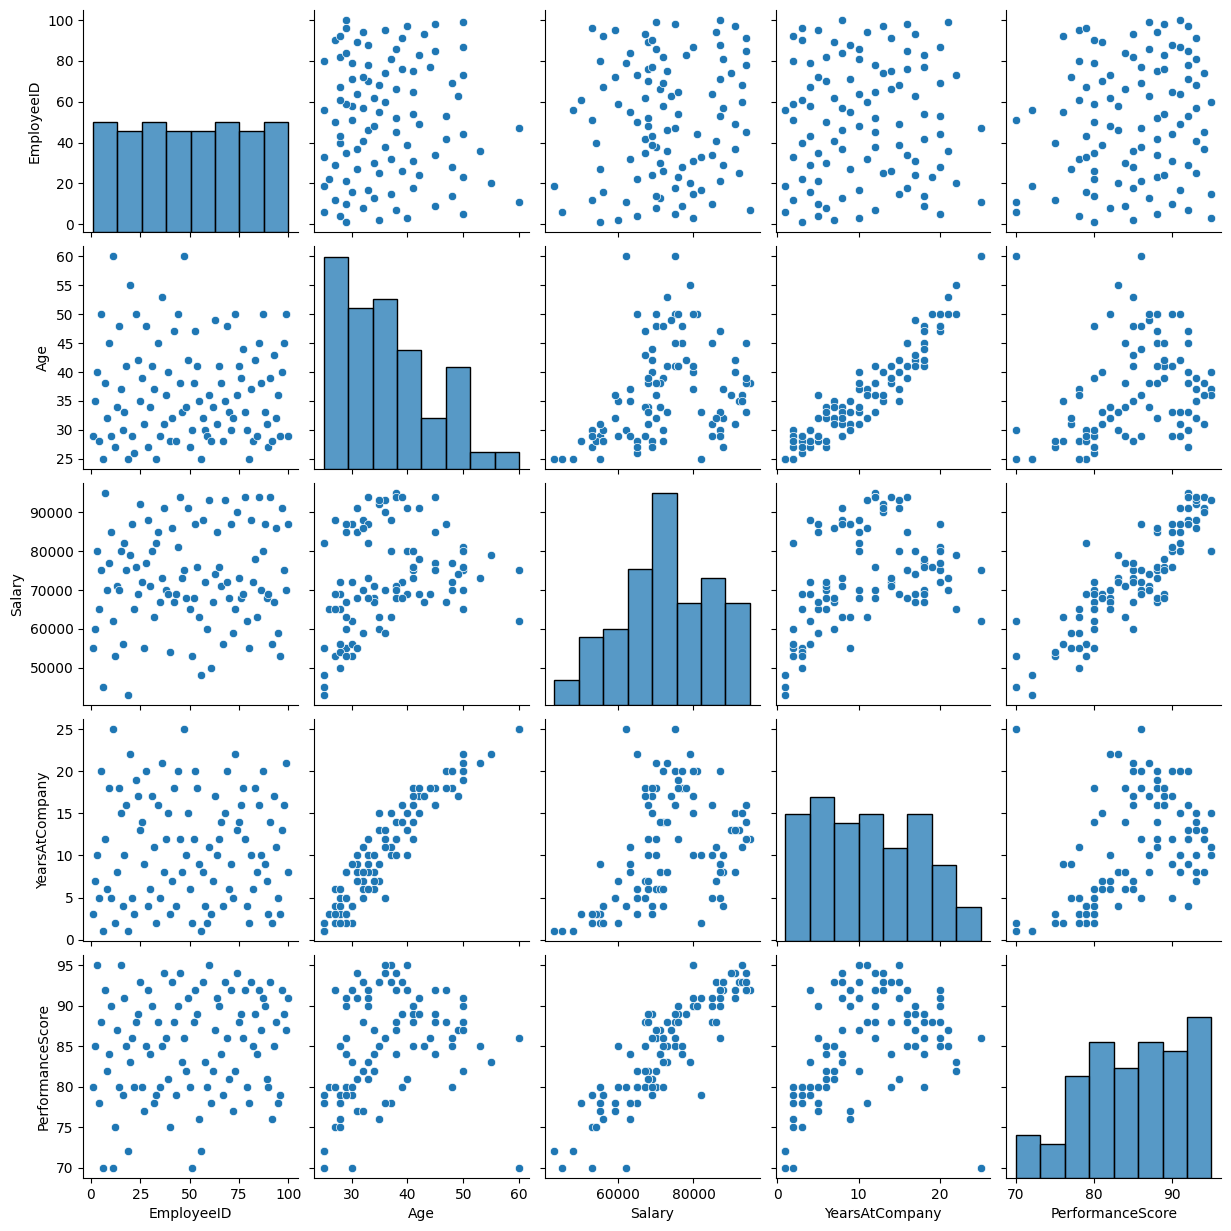

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
sns.heatmap(df.corr(), annot=True)
sns.boxplot(data=df[['Salary', 'Age', 'Performance Score']])


In [30]:
import pandas as pd
from scipy.stats import f_oneway

# Load dataset
df = pd.read_csv("/kaggle/input/employee-dataset/employee_data.csv")

# 1️⃣ Probability of Attrition by Department
# Note: Make sure 'Attrition' column has values like 'Yes' and 'No'
prob_attrition_by_dept = df[df['Attrition'] == 'Yes'].groupby('Department').size() / df.groupby('Department').size()

print("📊 Probability of Attrition by Department:")
print(prob_attrition_by_dept)
print("\n")

# 2️⃣ Hypothesis Testing: ANOVA to check if mean performance score differs across departments

# Create groups of performance scores by department
groups = [group['PerformanceScore'].values for name, group in df.groupby('Department')]

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print("📈 ANOVA Results for Performance Score Across Departments:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("✅ Reject the null hypothesis: There is a significant difference in performance scores across departments.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in performance scores across departments.")


📊 Probability of Attrition by Department:
Department
Engineering    0.428571
HR             0.346154
Marketing      0.200000
Sales          0.538462
dtype: float64


📈 ANOVA Results for Performance Score Across Departments:
F-statistic: 25.7811
P-value: 0.0000
✅ Reject the null hypothesis: There is a significant difference in performance scores across departments.


In [28]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/kaggle/input/employee-dataset/employee_data.csv")

# Define "Low Performance" threshold — you can adjust this
threshold = df['PerformanceScore'].quantile(0.25)  # bottom 25%
df['Low_Performance'] = df['PerformanceScore'] <= threshold

# Calculate probabilities
# P(A): Probability of attrition
p_attrition = len(df[df['Attrition'] == 'Yes']) / len(df)

# P(B): Probability of low performance
p_low_perf = len(df[df['Low_Performance'] == True]) / len(df)

# P(B|A): Probability of low performance given attrition
attrition_df = df[df['Attrition'] == 'Yes']
p_low_perf_given_attrition = len(attrition_df[attrition_df['Low_Performance'] == True]) / len(attrition_df)

# Apply Bayes' Theorem
p_attrition_given_low_perf = (p_low_perf_given_attrition * p_attrition) / p_low_perf

print(f"P(Attrition | Low Performance) = {p_attrition_given_low_perf:.4f}")


P(Attrition | Low Performance) = 0.2667


In [18]:
from scipy.stats import f_oneway

groups = [group['PerformanceScore'].values for name, group in df.groupby('Department')]
f_stat, p_val = f_oneway(*groups)



In [20]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Department'] = le.fit_transform(df['Department'])

scaler = MinMaxScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])


              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.62      0.62      0.62         8

    accuracy                           0.70        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.70      0.70      0.70        20



<Axes: >

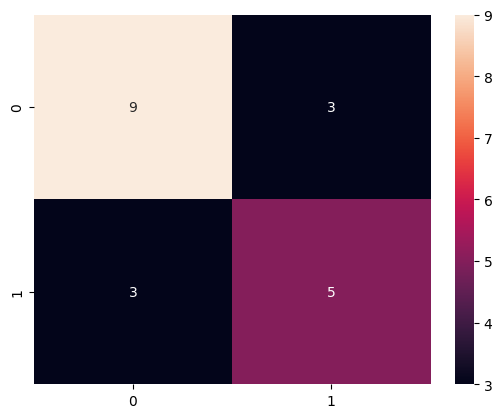

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(['Attrition', 'Name', 'EmployeeID'], axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

model.evaluate(X_test, y_test)


2025-06-10 03:55:33.535378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749527733.815523      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749527733.896966      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-10 03:55:50.373561: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.6072 - val_loss: 0.3289
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6153 - val_loss: 0.3071
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4139 - val_loss: 0.6653
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5188 - val_loss: 0.4123
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3482 - val_loss: 0.2746
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3406 - val_loss: 0.2502
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2876 - val_loss: 0.2881
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2735 - val_loss: 0.2552
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2720 - val_loss: 0.2529
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2424 - val_loss: 0.2901
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2769 - val_loss: 0.2564
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2359 - val_loss: 0.3009


0.16895224153995514

In [24]:
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

model.evaluate(X_test, y_test)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.6328 - loss: 0.6727 - val_accuracy: 0.6250 - val_loss: 0.8036
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4332 - loss: 0.7406 - val_accuracy: 0.6250 - val_loss: 0.7092
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6063 - loss: 0.6720 - val_accuracy: 0.5000 - val_loss: 0.7903
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6328 - loss: 0.6996 - val_accuracy: 0.5000 - val_loss: 0.7575
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5985 - loss: 0.6937 - val_accuracy: 0.3750 - val_loss: 0.7009
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6576 - loss: 0.6512 - val_accuracy: 0.5000 - val_loss: 0.7202
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6684 - loss: 0.6700 - val_accuracy: 0.6250 - val_loss: 0.7126
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7027 - loss: 0.6577 - val_accuracy: 0.3750 - val_loss: 0.7033
Epo

[0.5948103666305542, 0.75]